## Observations and Insights

## Dependencies and starter code

In [107]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

mouse_metadata.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [10]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [101]:
# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata, study_results, on="Mouse ID", how='left') 
combined_data.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [12]:
combined_data.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


## Summary statistics

In [7]:
combined_data.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#mean
tumor_volume_mean= combined_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_volume_mean.head()

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Name: Tumor Volume (mm3), dtype: float64

In [18]:
#median
tumor_volume_median=combined_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_volume_median.head(20)

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [20]:
#variance
tumor_volume_variance=combined_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_volume_variance.head()

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Name: Tumor Volume (mm3), dtype: float64

In [34]:
#Look at regimen
regimen_count= combined_data['Drug Regimen'].value_counts()
regimen_count


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

In [37]:
#how many drug regimens are there?
reg_count=combined_data['Drug Regimen'].unique()
reg_count

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [21]:
#standard deviation
tumor_volume_std=combined_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_volume_std.head()

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Name: Tumor Volume (mm3), dtype: float64

In [22]:
#SEM
tumor_volume_sem=combined_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
tumor_volume_sem.head()

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Name: Tumor Volume (mm3), dtype: float64

In [25]:
#combine results into summary statistics table
summary_stat_tumor_volume=pd.DataFrame({'Mean': tumor_volume_mean, 'Median': tumor_volume_median, 'Variance': tumor_volume_variance, 'Standard Deviation': tumor_volume_std, 'SEM': tumor_volume_sem})

summary_stat_tumor_volume.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots

In [52]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
mice_on_regimen_data=combined_data.drop_duplicates(subset='Mouse ID', inplace=True)
mice_on_regimen=combined_data.groupby('Drug Regimen').count()['Mouse ID']
mice_on_regimen



Drug Regimen
Ceftamin     4
Ketapril     2
Naftisol     2
Placebo      1
Propriva     1
Stelasyn     1
Zoniferol    1
Name: Mouse ID, dtype: int64

In [56]:
mice_on_regimen_dicts=[{"Ceftamin": "4", "Ketapril": "2", "Naftisol":"2", "Placebo": "1", "Propriva": "1", "Stelasyn": "1", "Zoniferol": "1"}]
df_mor=pd.DataFrame(mice_on_regimen_dicts)
df_mor
#FIX ADD CAPOMULIN

,Ceftamin,Ketapril,Naftisol,Placebo,Propriva,Stelasyn,Zoniferol
0,4,2,2,1,1,1,1


In [71]:
mice_on_regimen_df= pd.DataFrame({'Number of Mice': mice_on_regimen})
mice_on_regimen_df.reset_index(inplace= True)
mice_on_regimen_df

,Drug Regimen,Number of Mice
0,Ceftamin,4
1,Ketapril,2
2,Naftisol,2
3,Placebo,1
4,Propriva,1
5,Stelasyn,1
6,Zoniferol,1


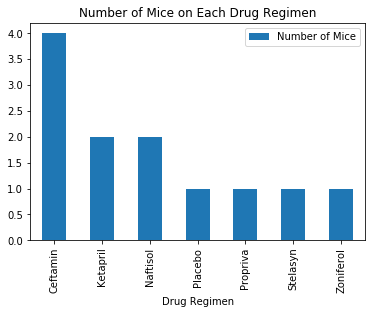

In [74]:
mice_and_regimen_pandas=mice_on_regimen_df[['Drug Regimen', 'Number of Mice']]
mice_and_regimen_pandas=mice_and_regimen_pandas.set_index('Drug Regimen')
mice_and_regimen_pandas.plot(kind='bar')
plt.title("Number of Mice on Each Drug Regimen")
plt.show()

In [75]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
mice_on_regimen_df.shape

(7, 2)

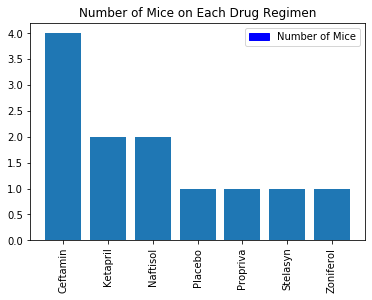

In [93]:
#x_axis=np.arange(mice_on_regimen.shape[0])
#plt.figure(figsize=(20,3))
#plt.bar(x_axis, mice_on_regimen_df['Number of Mice'], color='b', alpha=1, align='center')
#tick_locations=[value for value in x_axis]
#plt.xticks(tick_locations, mice_on_regimen_df['Ceftamin', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Stelasyn', 'Zoniferol'], rotation=vertical)
#plt.show()

objects = ('Ceftamin', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Stelasyn', 'Zoniferol')
y_pos = np.arange(len(objects))
mice = [4, 2, 2, 1, 1, 1, 1]

plt.bar(y_pos, mice, align='center', alpha=1)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('')
plt.title('Number of Mice on Each Drug Regimen')
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='blue', label='Number of Mice')
plt.legend(handles=[blue_patch])

plt.show()

## Pie plots

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

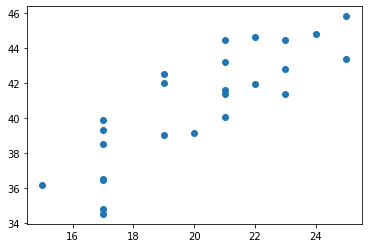

In [105]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df=combined_data.loc[combined_data["Drug Regimen"]=="Capomulin"]
mouse_weight=capomulin_df.groupby('Mouse ID').mean()
mouse_weight

plt.scatter(mouse_weight['Weight (g)'], mouse_weight['Tumor Volume (mm3)'])
plt.show()
#ADD X Y LABELS, EVERYTHING ELSE

(0.8419363424694717, 1.322572243471279e-07)


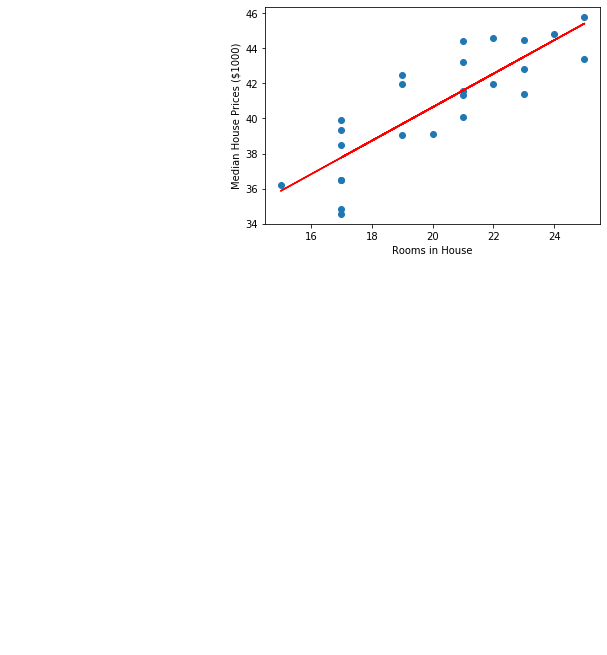

In [110]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = mouse_weight['Weight (g)']
y_values = mouse_weight['Tumor Volume (mm3)']

correlation = st.pearsonr(x_values,y_values)
print(correlation) #PRINT 'THIS IS.....MAKE NICE'

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()

#CHANGE X Y LABELS


